# CNN Assignment (Graded): Image Classification with Fashion MNSIT Dataset

Welcome to your programming assignment on Convolutional Neural Networks! You will build a Convolutional Neural Network (CNN) to classify images of the MNIST Fashion Dataset. 

## Problem Description

- In this assignment, you will build a Convolutional Neural Network (CNN) to classify images from the Fashion MNIST dataset.

- This dataset consists of 70,000 grayscale images in 10 categories and is considered to be more challenging than the original MNIST dataset.

## Dataset Description

An overview of the fashion MNIST dataset:

- 60,000 training images

- 10,000 test images
- 10 classes of clothing items
- Image size: 28x28 pixels (grayscale)

For more information, refer to this link: [Fashion MNIST Dataset](https://github.com/zalandoresearch/fashion-mnist)

## Assignment Tasks

**1. Data Preparation**
   - Normalize the pixel values
   
   - Split the data into training and validation sets

**2. Model Architecture**
   - Design a CNN with at least 2 convolutional layers and 1 dense layer
   - Include appropriate activation functions, pooling layers, and a flatten layer

**3. Model Compilation**
   - Choose an appropriate optimizer and loss function
   - Select accuracy as the metric to monitor

**4. Model Training**
   - Train the model for at least 10 epochs
   - Use a validation split to monitor for overfitting

**5. Model Evaluation**
   - Evaluate the model on the test set
   - Plot the training and validation accuracy/loss curves

**6. Predictions and Visualization**
   - Make predictions on a few test images
   - Visualize these images along with their predicted and actual labels

## Instructions

- Only write code when you see any of the below prompts,

    ```
    # YOUR CODE GOES HERE
    # YOUR CODE ENDS HERE
    # TODO
    ```

- Do not modify any other section of the code unless tated otherwise in the comments.

# Code Section

In [1]:
import tensorflow as tf

# Enable GPU execution
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
            print(f"GPU {gpu} memory growth set.")
    except RuntimeError as e:
        print(e)

print("Using device:", tf.config.list_logical_devices('GPU'))


GPU PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU') memory growth set.
Using device: [LogicalDevice(name='/device:GPU:0', device_type='GPU')]


2025-01-20 15:13:20.181462: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2025-01-20 15:13:20.181485: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-01-20 15:13:20.181488: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-01-20 15:13:20.181505: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-01-20 15:13:20.181516: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [2]:
   import tensorflow as tf

   device_name = tf.test.gpu_device_name()
   if device_name != '/device:GPU:0':
       raise SystemError('GPU device not found')
   print('Found GPU at: {}'.format(device_name))


Found GPU at: /device:GPU:0


2025-01-20 15:13:20.186916: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-01-20 15:13:20.186926: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
# import the necessary packages
import numpy as np
import tensorflow as tf
from helpers.methods import load_data, detect_and_set_device, display_image_grid, plot_training_history, plot_predictions
from tests.test_methods import test_preprocess_data, test_create_model, test_train_model, test_evaluate_model, test_make_predictions

In [5]:
# Load the data into training and testing sets
x_train, y_train, x_test, y_test = load_data()

## Task: Let's get to know about our dataset

### Shape of the dataset: Testing and Training

In [6]:
# TODO: Shape of the data

x_train_shape = x_train.shape
x_test_shape = x_test.shape
y_train_shape = y_train.shape
y_test_shape = y_test.shape
number_of_classes = len(set(y_train.flatten()))


print(f"Training Data Shape: {x_train_shape}")
print(f"Training Labels Shape: {y_train_shape}")
print(f"Test Data Shape: {x_test_shape}")
print(f"Test Labels Shape: {y_test_shape}")
print(f"Number of Classes: {number_of_classes}")

Training Data Shape: (60000, 28, 28, 1)
Training Labels Shape: (60000,)
Test Data Shape: (10000, 28, 28, 1)
Test Labels Shape: (10000,)
Number of Classes: 10


### Total number of images in each class

In [7]:
num_classes = len(np.unique(y_train))
for cls in range(num_classes):
  count = 0
  count = np.sum(y_train == cls)  
  print("Number of images belonging to {} is {}".format(cls, count))

Number of images belonging to 0 is 6000
Number of images belonging to 1 is 6000
Number of images belonging to 2 is 6000
Number of images belonging to 3 is 6000
Number of images belonging to 4 is 6000
Number of images belonging to 5 is 6000
Number of images belonging to 6 is 6000
Number of images belonging to 7 is 6000
Number of images belonging to 8 is 6000
Number of images belonging to 9 is 6000


## Task: Preprocessing the dataset

**Task Hints:**

Complete the preprocess_data method.

- Convert the pixel values of the training and test data (x_train and x_test) to floating-point numbers and scale them to the range [0, 1].

- Ensure that the labels (y_train and y_test) have the correct shape by reshaping them into column vectors (with dimensions (-1, 1)).

In [8]:
def preprocess_data(x_train, y_train, x_test, y_test):
    # Normalize the images to [0, 1] range
    x_train = x_train.astype("float32") / 255.0
    x_test = x_test.astype("float32") / 255.0

    # Ensure labels are in the correct shape (column vectors)
    y_train = y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)

    # Print shapes to verify correctness
    print("Training data shape:", x_train.shape)
    print("Training labels shape:", y_train.shape)
    print("Test data shape:", x_test.shape)
    print("Test labels shape:", y_test.shape)


    return x_train, y_train, x_test, y_test
x_train, y_train, x_test, y_test = preprocess_data(x_train, y_train, x_test, y_test)


Training data shape: (60000, 28, 28, 1)
Training labels shape: (60000, 1)
Test data shape: (10000, 28, 28, 1)
Test labels shape: (10000, 1)


## Task: Model Building

**Task Hints:**

Complete the create_model and compile_model function to define a CNN for image classification.

Layers:

- Add two Conv2D layers (32 and 64 filters) with ReLU activation and MaxPooling2D after each.

- Flatten the output using Flatten().
- Add a fully connected Dense layer with 64 neurons (ReLU), followed by a 10-neuron Dense layer with softmax for classification.

In [9]:
import tensorflow as tf

def create_model():
    model = tf.keras.models.Sequential([
        # Add two Conv2D layers (32 and 64 filters) with ReLU activation and MaxPooling2D after each.
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),

        # Flatten the output using Flatten().
        tf.keras.layers.Flatten(),

        # Add a fully connected Dense layer with 64 neurons (ReLU), followed by a 10-neuron Dense layer with softmax for classification.
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    # Do not change the code below
    test_create_model(model)
    
    return model


Compile the model:

- Use Adam optimizer, sparse categorical crossentropy loss, and accuracy as the metric.

In [10]:
def compile_model(model):
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model


## Task: Model Training

**Task Hints:**

Complete the train_model function to train the CNN using the provided training data.

- Set epochs=10 and validation_split=0.2.

- Train the model using model.fit(), providing x_train, y_train, epochs, and validation_split.

In [11]:
np.random.seed(43)  # for reproducibility
tf.random.set_seed(43)  # for reproducibility

In [12]:
def train_model(model, x_train, y_train, runtime_device):
    # TODO: Define validation_split and epochs
    validation_split = 0.2
    epochs = 10

    with tf.device('/' + runtime_device + ':0'):
        # Train the model using model.fit(), providing x_train, y_train, epochs, and validation_split.
        history = model.fit(x_train, y_train, epochs=epochs, validation_split=validation_split)
        
        # Do not change the code below
        test_train_model(history)
        
    return history


## Task: Model Evaluation

**Task Hints:**

Complete the evaluate_model function to test the trained model on the test dataset.

- Use model.evaluate() to calculate the loss and accuracy on x_test and y_test.

- Print the test accuracy for reference.



In [13]:
def evaluate_model(model, x_test, y_test, runtime_device):
    with tf.device('/' + runtime_device + ':0'):
        # Use model.evaluate() to calculate the loss and accuracy on x_test and y_test.
        test_loss, test_acc = model.evaluate(x_test, y_test)

        # Print the test accuracy for reference.
        print(f"Test accuracy: {test_acc:.4f}")
        
        # Do not change the code below
        test_evaluate_model(test_loss, test_acc)
        
    return test_loss, test_acc


## Task: Make Predictions with the Model

**Task Hints:**

Complete the make_predictions function to generate predictions using the trained model on the test dataset.

- Use model.predict() to generate predictions on x_test.



In [14]:
from tests.test_methods import test_make_predictions  # Import the correct function

def make_predictions(model, x_test, runtime_device):
    with tf.device('/' + runtime_device + ':0'):
        predictions = model.predict(x_test)

        # Use test_make_predictions instead of test_predict_model
        test_make_predictions(predictions)

    return predictions


## Driver Code to run the built pipeline

In [15]:
#---------------- Do not change the code below ----------------#
def run_classifier(x_train, y_train, x_test, y_test):
    data_dir = 'data'

    runtime_device = detect_and_set_device()

    x_train, y_train, x_test, y_test = preprocess_data(x_train, y_train, x_test, y_test)

    model = create_model()
    model = compile_model(model)
    history = train_model(model, x_train, y_train, runtime_device)
    evaluate_model(model, x_test, y_test, runtime_device)

    predictions = make_predictions(model, x_test, runtime_device)
    return history, predictions


In [16]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
        tf.config.set_visible_devices(gpus[0], 'GPU')
        print("Using GPU:", gpus[0])
    except RuntimeError as e:
        print(e)


Using GPU: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [18]:
if __name__ == '__main__':
    # Ensure data is loaded before calling run_classifier
    x_train, y_train, x_test, y_test = load_data()

    # Run the classifier with the dataset
    history, predictions = run_classifier(x_train, y_train, x_test, y_test)


GPU is not available. Using CPU.
Training data shape: (60000, 28, 28, 1)
Training labels shape: (60000, 1)
Test data shape: (10000, 28, 28, 1)
Test labels shape: (10000, 1)
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7539 - loss: 0.6874 - val_accuracy: 0.8687 - val_loss: 0.3614
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8743 - loss: 0.3429 - val_accuracy: 0.8882 - val_loss: 0.3106
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8939 - loss: 0.2887 - val_accuracy: 0.8947 - val_loss: 0.2848
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9065 - loss: 0.2561 - val_accuracy: 0.9026 - val_loss: 0.2727
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9150 - loss: 0.2305 - val_accuracy: 0.9042 - val_loss: 0.2693
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9233 - loss: 0.2083 - val_accuracy: 0.9053 - val_loss: 0.2700
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━

## Plot Training History

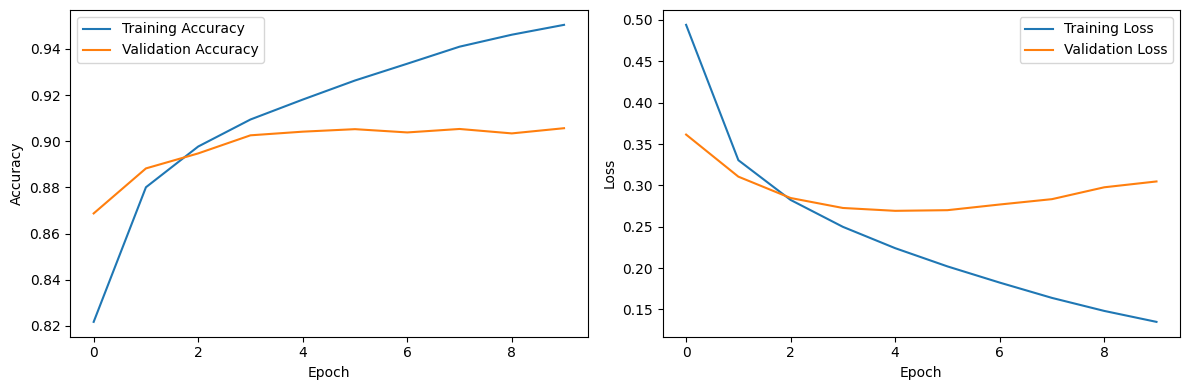

In [19]:
# Run this cell to plot the training history
plot_training_history(history)

## Plot Predictions

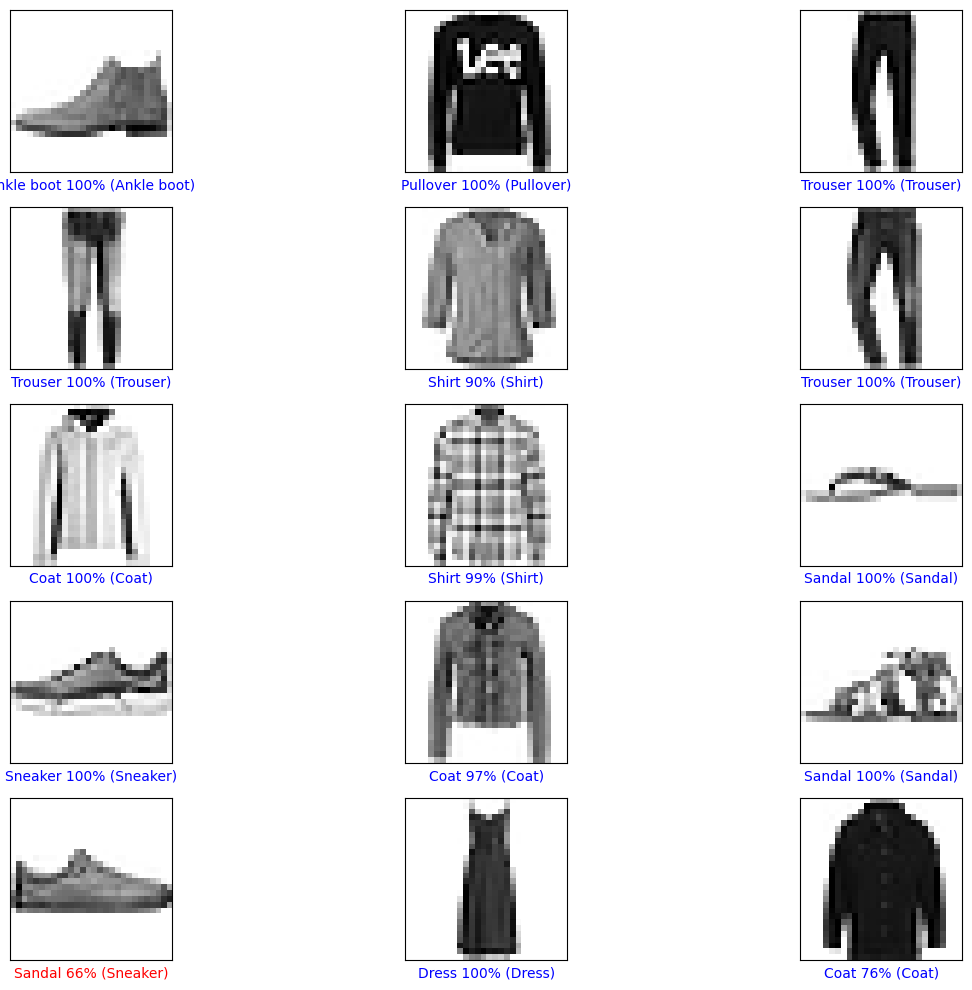

In [20]:
# Run this cell to plot the predictions
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plot_predictions(predictions, x_test, y_test, class_names)